# Quaterly Rolling GeoMAD

* **Products used:** 
[gm_s2_rolling](https://explorer.digitalearth.africa/gm_s2_rolling)

## Background

Satellite imagery allows us to observe the Earth with significant accuracy and detail. However, missing data &mdash; such as gaps caused by cloud cover &mdash; can make it difficult to put together a complete image. 

In order to produce a single, complete view of a certain area, satellite data must be consolidated, stacking measurements from different points in time to create a composite image.

The Digital Earth Africa (DE Africa) GeoMAD (**Geo**median and **M**edian **A**bsolute **D**eviations) is a cloud-free composite of satellite data compiled for over annual and semi-annual (six-month) periods during each calendar year.

**Important details:**

* Datacube product names: `gm_s2_rolling`
* Geomedian surface reflectance product
    * Valid scaling range: `1 - 10,000`
    * `0` is `no data`
* Median Absolute Deviation product
    * Valid scaling range: Spectral MAD: `0 - 1` , Bray-Curtis MAD `0 - 1`, Euclidean MAD `0 - 10,000` 
    * `NaN` is `nodata`
* Status: Operational
* Date-range: October 2020 &ndash; present
* Spatial resolution: 10m

>Note: For a detailed description of other DE Africa's GeoMAD service, see the DE Africa [GeoMAD technical specifications](https://docs.digitalearthafrica.org/en/latest/data_specs/GeoMAD_specs.html).

## Description

In this notebook we will load Quarterly Rolling GeoMAD data using `dc.load()` to return a time series of satellite images. The returned xarray.Dataset will contain analysis-ready images.

Topics covered include:
1. Inspecting the quarterly rolling GeoMAD products and measurements available in the datacube
2. Load quarterly rolling GeoMAD data
3. Plot the result of the quarterly rolling GeoMAD
4. Load Sentinel-2 for the same time period using `load_ard`
5. Compute Sentinel-2 monthly mean 
6. Compare the results

***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

### Load packages

In [1]:
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import datacube
from datacube.utils.geometry import Geometry

from deafrica_tools.datahandling import load_ard
from deafrica_tools.plotting import rgb, display_map
from deafrica_tools.areaofinterest import define_area

/usr/local/lib/python3.8/dist-packages/geopandas/_compat.py:112: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


### Connect to the datacube

In [2]:
dc = datacube.Datacube(app='GeoMAD_rolling')

### List measurements

Inspect the measurement or bands available for the quartely rolling Sentinel-2 GEOMAD using datacube's `list_measurements` functionality.

In [3]:
product_name = 'gm_s2_rolling'

dc_measurements = dc.list_measurements()
dc_measurements.loc[product_name].drop('flags_definition', axis=1)

name    dtype units  nodata                       aliases
measurement                                                            
B02            B02   uint16     1     0.0               [band_02, blue]
B03            B03   uint16     1     0.0              [band_03, green]
B04            B04   uint16     1     0.0                [band_04, red]
B05            B05   uint16     1     0.0         [band_05, red_edge_1]
B06            B06   uint16     1     0.0         [band_06, red_edge_2]
B07            B07   uint16     1     0.0         [band_07, red_edge_3]
B08            B08   uint16     1     0.0         [band_08, nir, nir_1]
B8A            B8A   uint16     1     0.0  [band_8a, nir_narrow, nir_2]
B11            B11   uint16     1     0.0    [band_11, swir_1, swir_16]
B12            B12   uint16     1     0.0    [band_12, swir_2, swir_22]
SMAD          SMAD  float32     1     NaN            [smad, sdev, SDEV]
EMAD          EMAD  float32     1     NaN            [emad, edev, EDEV]
BCMAD        BCMAD  float32     1     NaN         [bcmad, bcdev, BCDEV]
COUNT        COUNT   uint16     1     0.0                       [count]

### Define Area of Interest

In [4]:
#Specify the latitude, longitude, and buffer
aoi = define_area(lat=30.8197, lon=31.2510, buffer=0.1)

#Create a geopolygon and geodataframe of the area of interest
geopolygon = Geometry(aoi["features"][0]["geometry"], crs="epsg:4326")
geopolygon_gdf = gpd.GeoDataFrame(geometry=[geopolygon], crs=geopolygon.crs)

# Get the latitude and longitude range of the geopolygon
lat_range = (geopolygon_gdf.total_bounds[1], geopolygon_gdf.total_bounds[3])
lon_range = (geopolygon_gdf.total_bounds[0], geopolygon_gdf.total_bounds[2])

### Display area of interest with a basemap using `display_map()`

In [5]:
display_map(x=lon_range, y=lat_range)

### Load quarterly rolling sentinel-2 GEOMAD data using `dc.load()`. 
For a more discussion of how to load data using the datacube, refer to the [Introduction to loading data](../Beginners_guide/03_Loading_data.ipynb) notebook

In [6]:
ds = dc.load(product="gm_s2_rolling",
             measurements=['red','green','blue','nir'],
             x=lon_range,
             y=lat_range,
             resolution=(-20, 20),
             output_crs = 'epsg:6933',
             time=("2022-02","2022-12"),
             
             )
display(ds)

<xarray.Dataset>
Dimensions:      (time: 11, y: 1100, x: 965)
Coordinates:
  * time         (time) datetime64[ns] 2022-01-14T23:59:59.999999 ... 2022-11...
  * y            (y) float64 3.76e+06 3.76e+06 3.76e+06 ... 3.738e+06 3.738e+06
  * x            (x) float64 3.006e+06 3.006e+06 ... 3.025e+06 3.025e+06
    spatial_ref  int32 6933
Data variables:
    red          (time, y, x) uint16 537 320 305 338 335 ... 1057 1361 1096 1216
    green        (time, y, x) uint16 624 617 644 684 606 ... 800 1057 857 967
    blue         (time, y, x) uint16 415 335 331 349 339 ... 641 668 862 727 815
    nir          (time, y, x) uint16 2660 3903 4321 4255 ... 1278 1628 1306 1477
Attributes:
    crs:           EPSG:6933
    grid_mapping:  spatial_ref

### Plot quarterly rolling GeoMAD

We can plot the data we loaded using the `rgb()` function. By default, the function will plot data as a true colour image using the 'red', 'green', and 'blue' bands.

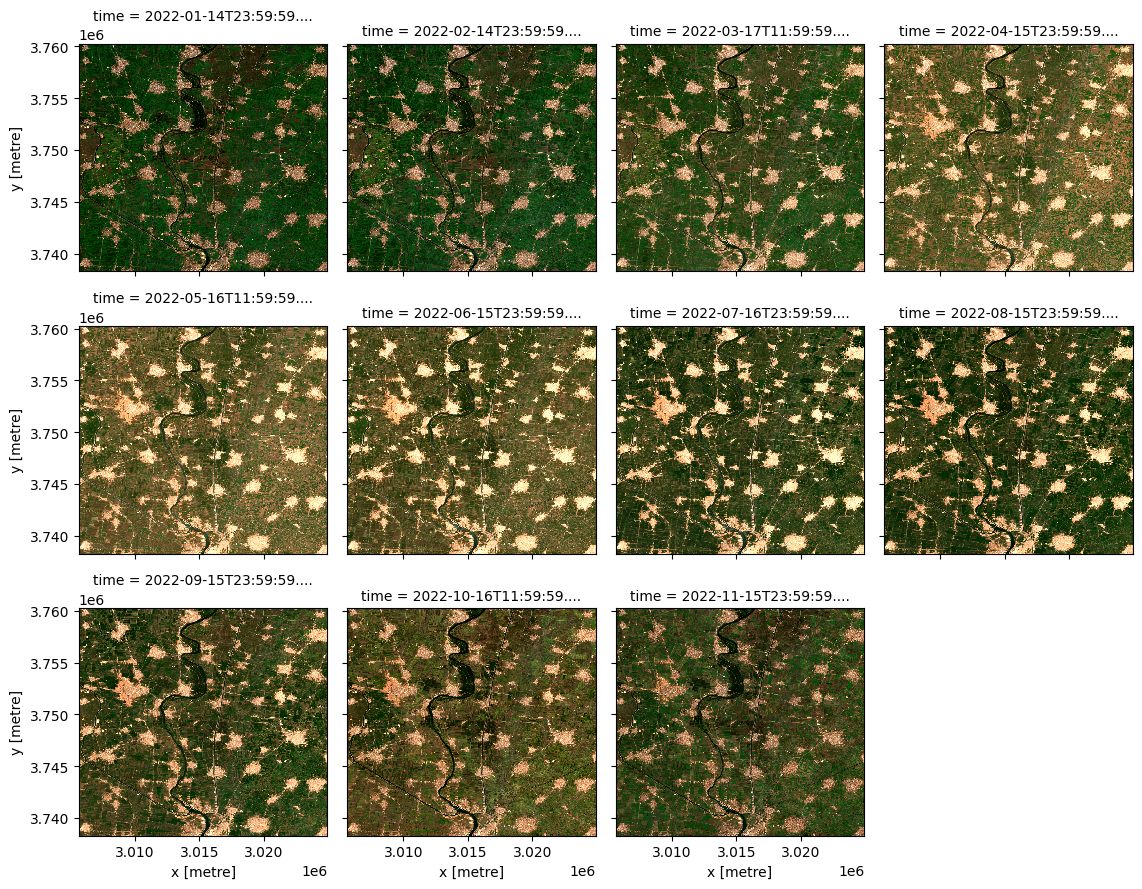

In [7]:
rgb(ds, col='time', col_wrap=4, size=3)

### Load sentinel-2 using `load_ard`

`load_ard` function is used here to load data that has been masked for cloud, shadow and quality filters, making it ready for analysis. refer to the [Using_load_ard](../Frequently_used_code/Using_load_ard.ipynb) notebook.

In [8]:
ds_sentinel = load_ard(
                dc=dc, 
                products=["s2_l2a"],
                measurements=['red', 'green', 'blue', 'nir'],
                time=("2022-01","2022-11"),
                like = ds.geobox
             )

Using pixel quality parameters for Sentinel 2
Finding datasets
    s2_l2a
Applying pixel quality/cloud mask
Loading 266 time steps


/usr/local/lib/python3.8/dist-packages/rasterio/warp.py:346: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  _reproject(


### Resampling the daily sentinel-2 to monthly data
`resample()` method will be used to  summarise our dataset into larger chunks of time. In the next cell we produce a mean composite for every months of data in our dataset:

In [9]:
ds_resampled = ds_sentinel.resample(time="1m").mean()

### Plotting monthly mean GeoMAD using rgb()

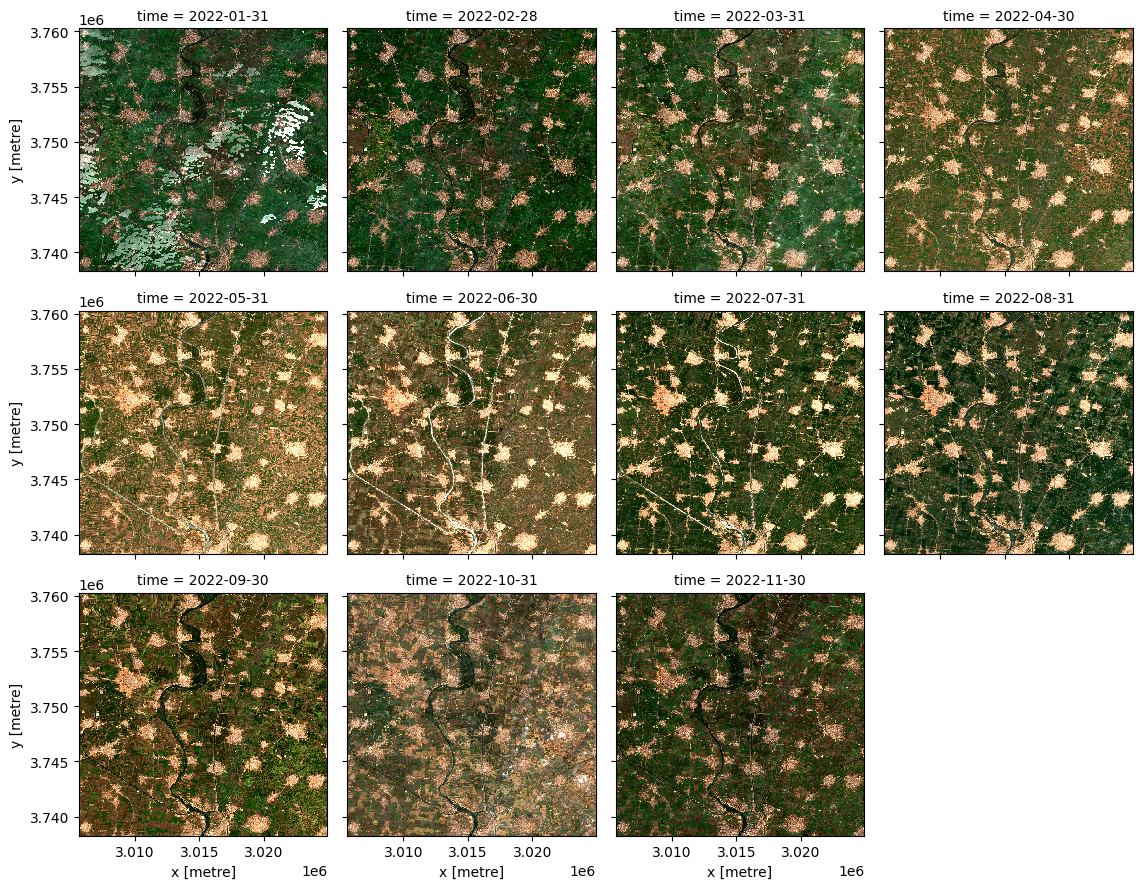

In [10]:
rgb(ds_resampled, col='time', col_wrap=4, size=3)

***

## Additional information

**License:** The code in this notebook is licensed under the [Apache License, Version 2.0](https://www.apache.org/licenses/LICENSE-2.0). 
Digital Earth Africa data is licensed under the [Creative Commons by Attribution 4.0](https://creativecommons.org/licenses/by/4.0/) license.

**Contact:** If you need assistance, please post a question on the [Open Data Cube Slack channel](http://slack.opendatacube.org/) or on the [GIS Stack Exchange](https://gis.stackexchange.com/questions/ask?tags=open-data-cube) using the `open-data-cube` tag (you can view previously asked questions [here](https://gis.stackexchange.com/questions/tagged/open-data-cube)).
If you would like to report an issue with this notebook, you can file one on [Github](https://github.com/digitalearthafrica/deafrica-sandbox-notebooks).

**Compatible datacube version:** 

In [11]:
print(datacube.__version__)

1.8.8


**Last Tested:**

In [12]:
from datetime import datetime
datetime.today().strftime('%Y-%m-%d')

'2023-05-11'